In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = 12
b = 0.32
d = 1
sigma = 50

In [3]:
size = 256  # size of the 2D grid
dx = 0.5  # space step
T = 160.  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

print(f"number of iterations: {n}")

number of iterations: 160000


In [4]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)
U0 = U
V0 = U

In [5]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

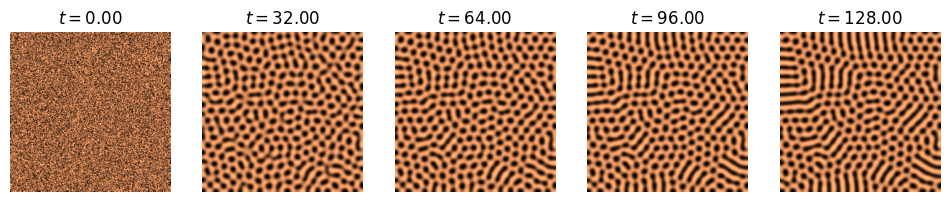

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(12,12))
step_plot = n // 5

# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a - Uc - 4*Uc*Vc/(1+Uc**2)  +deltaU),\
        Vc + dt * (sigma*(b*( Uc - Uc*Vc/(1+Uc**2) ) + d*deltaV))
    
    # Neumann conditions: derivatives at the edges are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at 20 different times.
    if i % step_plot == 0:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

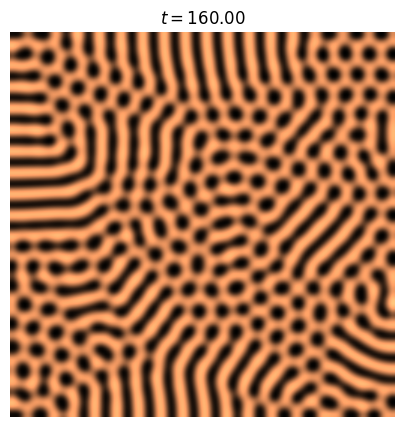

In [7]:
# t = 160
fig, ax = plt.subplots(1, 1, figsize=(5,5))
show_patterns(U, ax=ax)
ax.set_title(f'$t={i * dt:.2f}$') ;